# Sok-1006 - Mappeoppgave 1, case 1

In [17]:
#Importerer mappene jeg blir å trenge
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
import numpy as np
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv("https://uit-sok-1006-v22.github.io/innleveringer/chickendata.csv",delimiter=";")

In [2]:
# Programmere inn funksjonene (14). (15) og (16)

In [3]:
#Ligning 14
def demand_curve(c,Q,y,pb):
    demand = (c.log(Q)-(-4.507+(0.841*y)+(0.2775*pb)))/(-0.397) 
    return demand

In [4]:
#Ligning 15
def supply_long(c,Q,N,X,pf,t):
    long_supply_ = ((1-0.631)*c.log(N*Q+X)-(2.030-0.146*pf+0.0184*t))/(0.221)
    return long_supply_

In [5]:
#Ligning 16
def supply_short(c,Q,N,X,pf,t,Q_fitted):
    short_supply = ((c.log(N*Q+X))-(2.030-(0.146*pf)+(0.0184*t)+(0.631*c.log(N*Q_fitted+X))))/(0.221)
    return short_supply

In [6]:
#Lage en funksjon som finner hvilket kvantum som gir likevekt (tilbud=etterspørsel)
def equate_q(y,pb,N,X,pf,t):
    Q = sp.symbols('Q')
    verdi = sp.Eq(demand_curve(sp,Q,y,pb), supply_long(sp,Q,N,X,pf,t))
    sol = sp.nsolve(verdi, 50) #Er strartverdi
    
    return float(sol)

In [7]:
def plot_year(df,year):

    #obtaining the relevant variables for year:
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    cpi=d['CPI']
    y=np.log(d['Y'])
    pb=np.log(d['PBEEF']/cpi)
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/cpi)
    t=d['TIME']
     
    #obtaining equilibrium quantity:
    Q_fitted=equate_q(y,pb,N,X,pf,t) 
    
    #plotting the functions:
    Q = np.linspace(0.1,100,100)
    fig,ax=plt.subplots()
    ax.set_ylabel('Pris')
    ax.set_xlabel('Mengde')
    
    # tegn etterspørsel for forskjellige verdier 
    ax.plot(Q, np.exp(demand_curve(np, Q, y, pb))*cpi, label='Etterspørselskurve') 
    
    ax.plot(Q, np.exp(supply_long(np, Q, N, X, pf, t))*cpi,label='Kortsiktig tilbud') 
    
    ax.plot(Q, np.exp(supply_short(np, Q, N, X, pf, t, Q_fitted))*cpi,label='Langsiktig tilbud') 
    
    ax.legend(loc='best', frameon=False)
    ax.set(xlim=(0,100))
    ax.set(ylim=(0,400))
    plt.title('Etterspørsels- og tilbudskurver')
    
    plt.show()


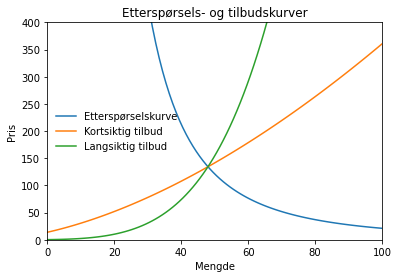

In [8]:
# Oppgave B4 og B5, plotte funksjonen
plot_year(df,1995)

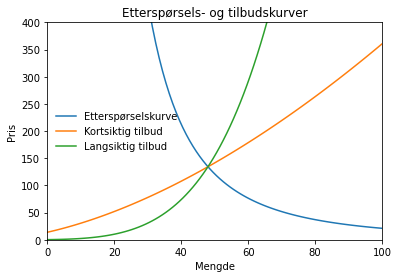

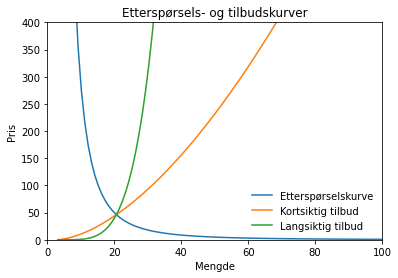

In [18]:
# Oppgave B6
#Fikk opp noen feilmeldinger men jeg trengte kun at plottene skulle vises så feilmeldingene er irrelevante siden plottet er riktig 

try:
    plot_year(df,1995) + plot_year(df,1960)
except TypeError:
    pass

#Den første figuren er for 1995 og den andre er for 1960

In [22]:
# Oppgave B7
def plot_year(df,year):

    #obtaining the relevant variables for year:
    d=df[df['YEAR']==year].to_dict(orient='records')[0]
    
    cpi=d['CPI']
    y=np.log(d['Y'])
    pb=np.log(d['PBEEF']/cpi)
    N=d['POP']
    X=d['QPRODA']/1439-d['Q']*d['POP']
    pf=np.log(d['PF']/cpi)
    t=d['TIME']
     
    #obtaining equilibrium quantity:
    Q_fitted=equate_q(y,pb,N,X,pf,t) 
    
    #plotting the functions:
    Q = np.linspace(0.1,100,100)
    fig,ax=plt.subplots()
    ax.set_ylabel('Pris')
    ax.set_xlabel('Mengde')
    
    # tegn etterspørsel for forskjellige verdier 
    ax.plot(Q, np.exp(demand_curve(np, Q, y, pb))*cpi, label='Etterspørselskurve') 
    ax.plot(Q, np.exp(demand_curve(np, Q+0.5, y, pb))*cpi,label='Kvantum') #kvantum
    ax.plot(Q, np.exp(demand_curve(np, Q, y+0.5, pb))*cpi,label='Inntekt') #inntekt 
    ax.plot(Q, np.exp(demand_curve(np, Q, y, pb+0.5))*cpi,label='Storfekjøtt') #storfekjøtt
    
    
    ax.plot(Q, np.exp(supply_long(np, Q, N, X, pf, t))*cpi,label='Kortsiktig tilbud')
    
    ax.plot(Q, np.exp(supply_short(np, Q, N, X, pf, t, Q_fitted))*cpi,label='Langsiktig tilbud') 
    
    ax.legend(loc='best', frameon=False)
    ax.set(xlim=(0,100))
    ax.set(ylim=(0,400))
    plt.title('Etterspørsels- og tilbudskurver for 1995')
    
    plt.show()

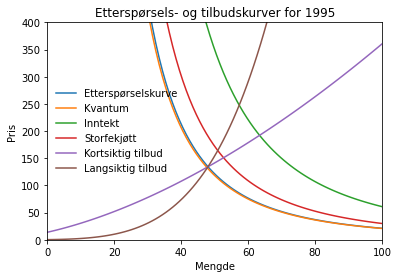

In [23]:
plot_year(df,1995)